In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations
import time

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [10]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_8/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_8/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Input_7,Input_8,Output
0,0.604994,0.292215,0.908453,0.355506,0.201669,0.575338,0.310311,0.734281,7.398721
1,0.178007,0.566223,0.994862,0.210325,0.320153,0.707909,0.635384,0.107132,7.005227
2,0.009077,0.811626,0.520520,0.075687,0.265112,0.091652,0.592415,0.367320,8.459482
3,0.506028,0.653730,0.363411,0.177981,0.093728,0.197425,0.755827,0.292472,8.284008
4,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117
5,0.778818,0.003419,0.337983,0.519528,0.820907,0.537247,0.551347,0.660032,8.541748
6,0.908649,0.062250,0.238260,0.766604,0.132336,0.990244,0.688068,0.742496,7.327435
7,0.586371,0.880736,0.745021,0.546035,0.009649,0.748992,0.230907,0.097916,7.299872
8,0.761137,0.854672,0.382124,0.337352,0.689708,0.309853,0.631380,0.041956,7.957875
9,0.984933,0.699506,0.998885,0.180148,0.580143,0.231087,0.490827,0.313683,5.592193


In [11]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Input_6':0.111111,'Input_7':0.111111,'Input_8':0.111111,'Output':9.56743}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[5.0e-01,1.0e-06,2.5e-01,7.5e-01,2.5e-01,2.5e-01,2.5e-01,7.5e-01,9.033300299999]
df.loc[len(df)] = new_data

new_data=[0.15,0.15,0.35,0.55,0.15,0.725,0.55,0.95,9.170675]
df.loc[len(df)] = new_data

# 14 may
df.loc[len(df)]=[0.333334,0.5,0.5,0.333334,0.333334,0.333334,0.666666,0.5,8.751078688886]
df.loc[len(df)]=[0.200001,0.200001,0.4,0.4,0.200001,0.799999,0.6,0.799999,9.1023007399954]
df.loc[len(df)]=[0.157895,0.052632,0.157895,0.333333,0.210527,0.333333,0.31579,0.5,9.7185386826085]

# 17 may
df.loc[len(df)]=[0.25,0.052632,0.210527,0.5,0.210527,0.5,0.210527,0.75,9.6273548350665]

# 20 may
df.loc[len(df)]=[0.052632,0.052632,0.157895,0.511111,0.263158,0.499999,0.526316,0.749999,9.4939825701369]
df.loc[len(df)]=[1.0e-06,2.0e-01,2.5e-01,1.0e-06,7.5e-01,5.0e-01,2.5e-01,1.0e-06,9.8695508199969]

# 8 jun
df.loc[len(df)]=[1.00000e-06,3.33334e-01,1.00000e-06,1.00000e-06,9.99999e-01,5.00000e-01,1.00000e-06,8.33333e-01,9.7677466955466]

# 13 jun
df.loc[len(df)]=[5.26320e-02,4.73684e-01,1.00000e-06,1.00000e-06,5.26316e-01,1.00000e-06,1.05264e-01,1.00000e-06,9.476142128]
df.loc[len(df)]=[0.166667,0.333334,0.166667,0.166667,0.666666,0.5,0.166667,0.5,9.941077316] #** new max


#Print
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Input_7,Input_8,Output
0,0.604994,0.292215,0.908453,0.355506,0.201669,0.575338,0.310311,0.734281,7.398721
1,0.178007,0.566223,0.994862,0.210325,0.320153,0.707909,0.635384,0.107132,7.005227
2,0.009077,0.811626,0.520520,0.075687,0.265112,0.091652,0.592415,0.367320,8.459482
3,0.506028,0.653730,0.363411,0.177981,0.093728,0.197425,0.755827,0.292472,8.284008
4,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117
5,0.778818,0.003419,0.337983,0.519528,0.820907,0.537247,0.551347,0.660032,8.541748
6,0.908649,0.062250,0.238260,0.766604,0.132336,0.990244,0.688068,0.742496,7.327435
7,0.586371,0.880736,0.745021,0.546035,0.009649,0.748992,0.230907,0.097916,7.299872
8,0.761137,0.854672,0.382124,0.337352,0.689708,0.309853,0.631380,0.041956,7.957875
9,0.984933,0.699506,0.998885,0.180148,0.580143,0.231087,0.490827,0.313683,5.592193


# Function 8: High-dimensional Optimisation

### You’ve reach the final, 8-dimensional search space. High-dimensional black-box optimisation can be very difficult, so sticking to local solutions is not the worst idea here.

## Data exploration

In [12]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5    Input_6  \
count  52.000000  52.000000  52.000000  52.000000  52.000000  52.000000   
mean    0.449204   0.410487   0.446017   0.401414   0.450570   0.451112   
std     0.321163   0.304075   0.287228   0.261878   0.280685   0.265676   
min     0.000001   0.000001   0.000001   0.000001   0.009649   0.000001   
25%     0.155921   0.117273   0.236776   0.161857   0.212251   0.248887   
50%     0.420981   0.385535   0.379438   0.412299   0.369659   0.427611   
75%     0.772024   0.636008   0.701192   0.619669   0.697207   0.667588   
max     0.985945   0.973980   0.998885   0.902986   0.999999   0.990244   

         Input_7    Input_8     Output  
count  52.000000  52.000000  52.000000  
mean    0.517696   0.513716   8.194811  
std     0.272271   0.291092   1.105524  
min     0.000001   0.000001   5.592193  
25%     0.253372   0.294756   7.366171  
50%     0.552563   0.525116   8.281035  
75%     0.

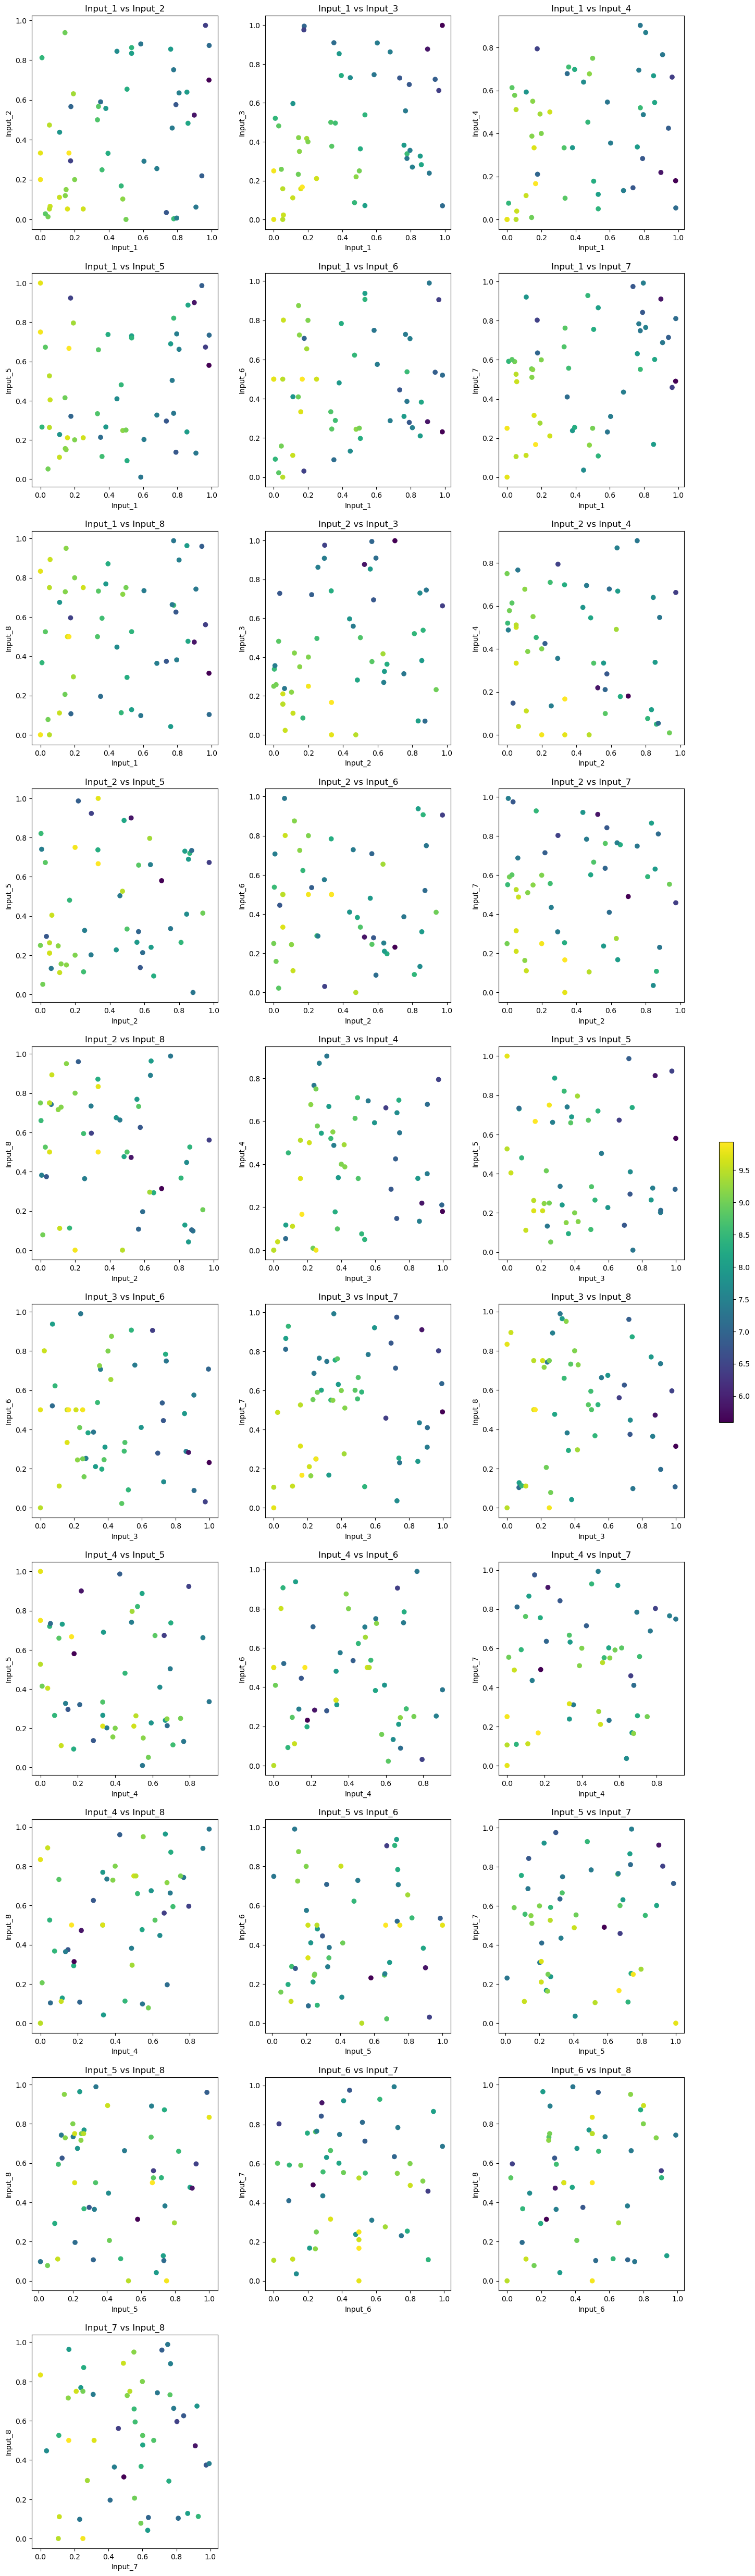

In [13]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

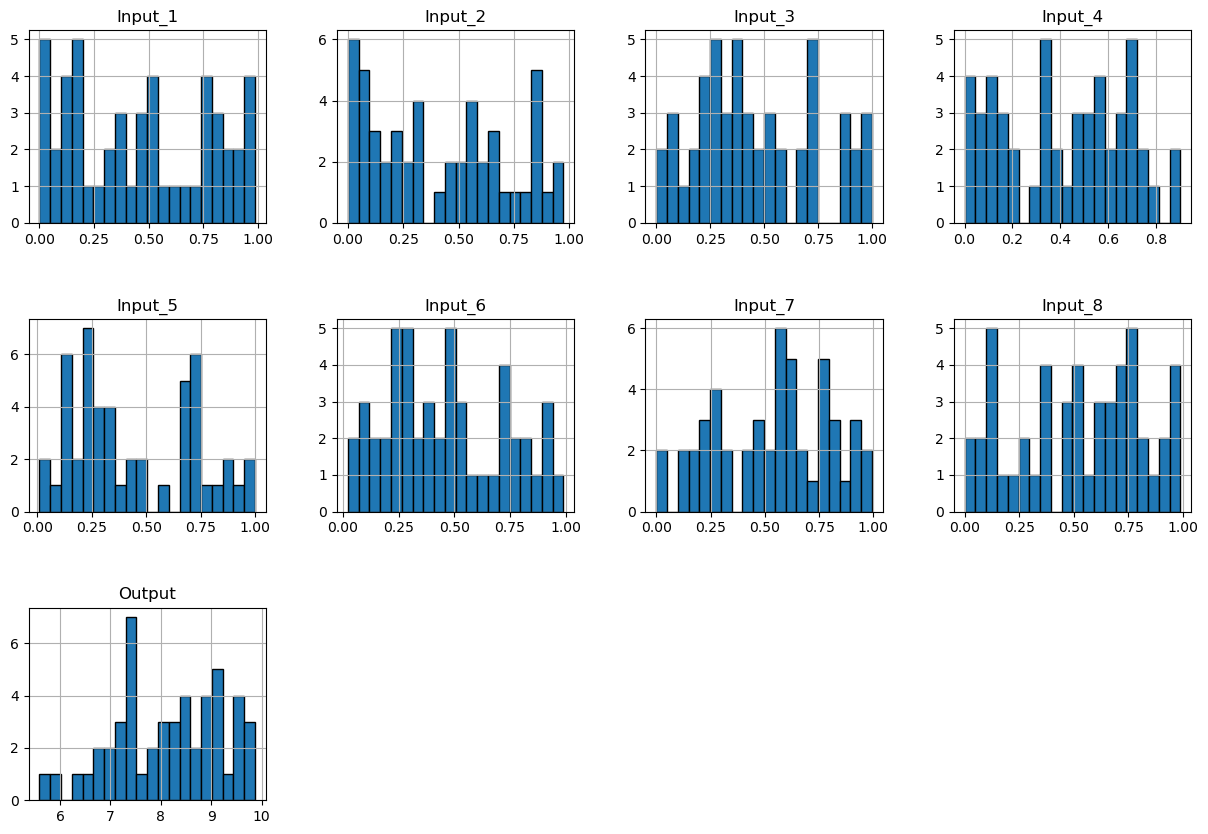

In [80]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

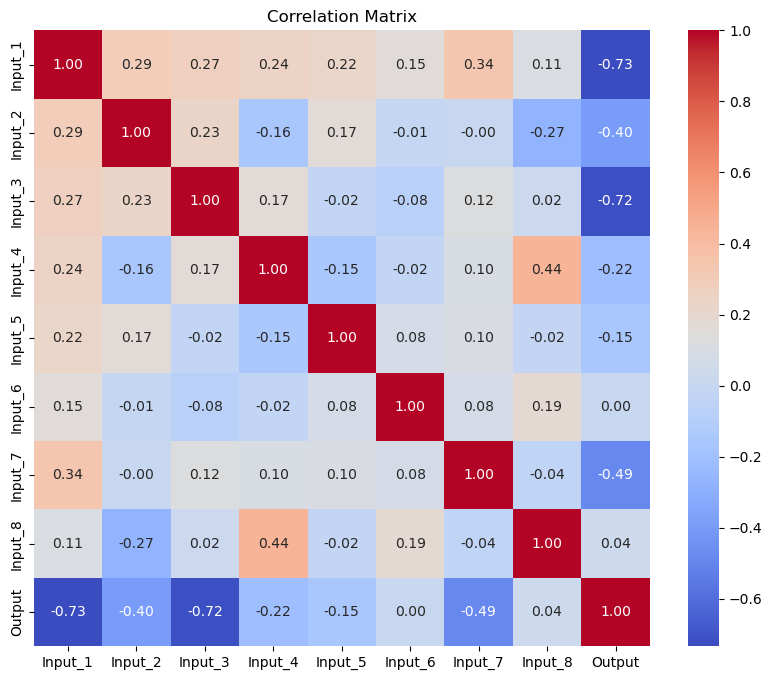

In [6]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/macponcho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


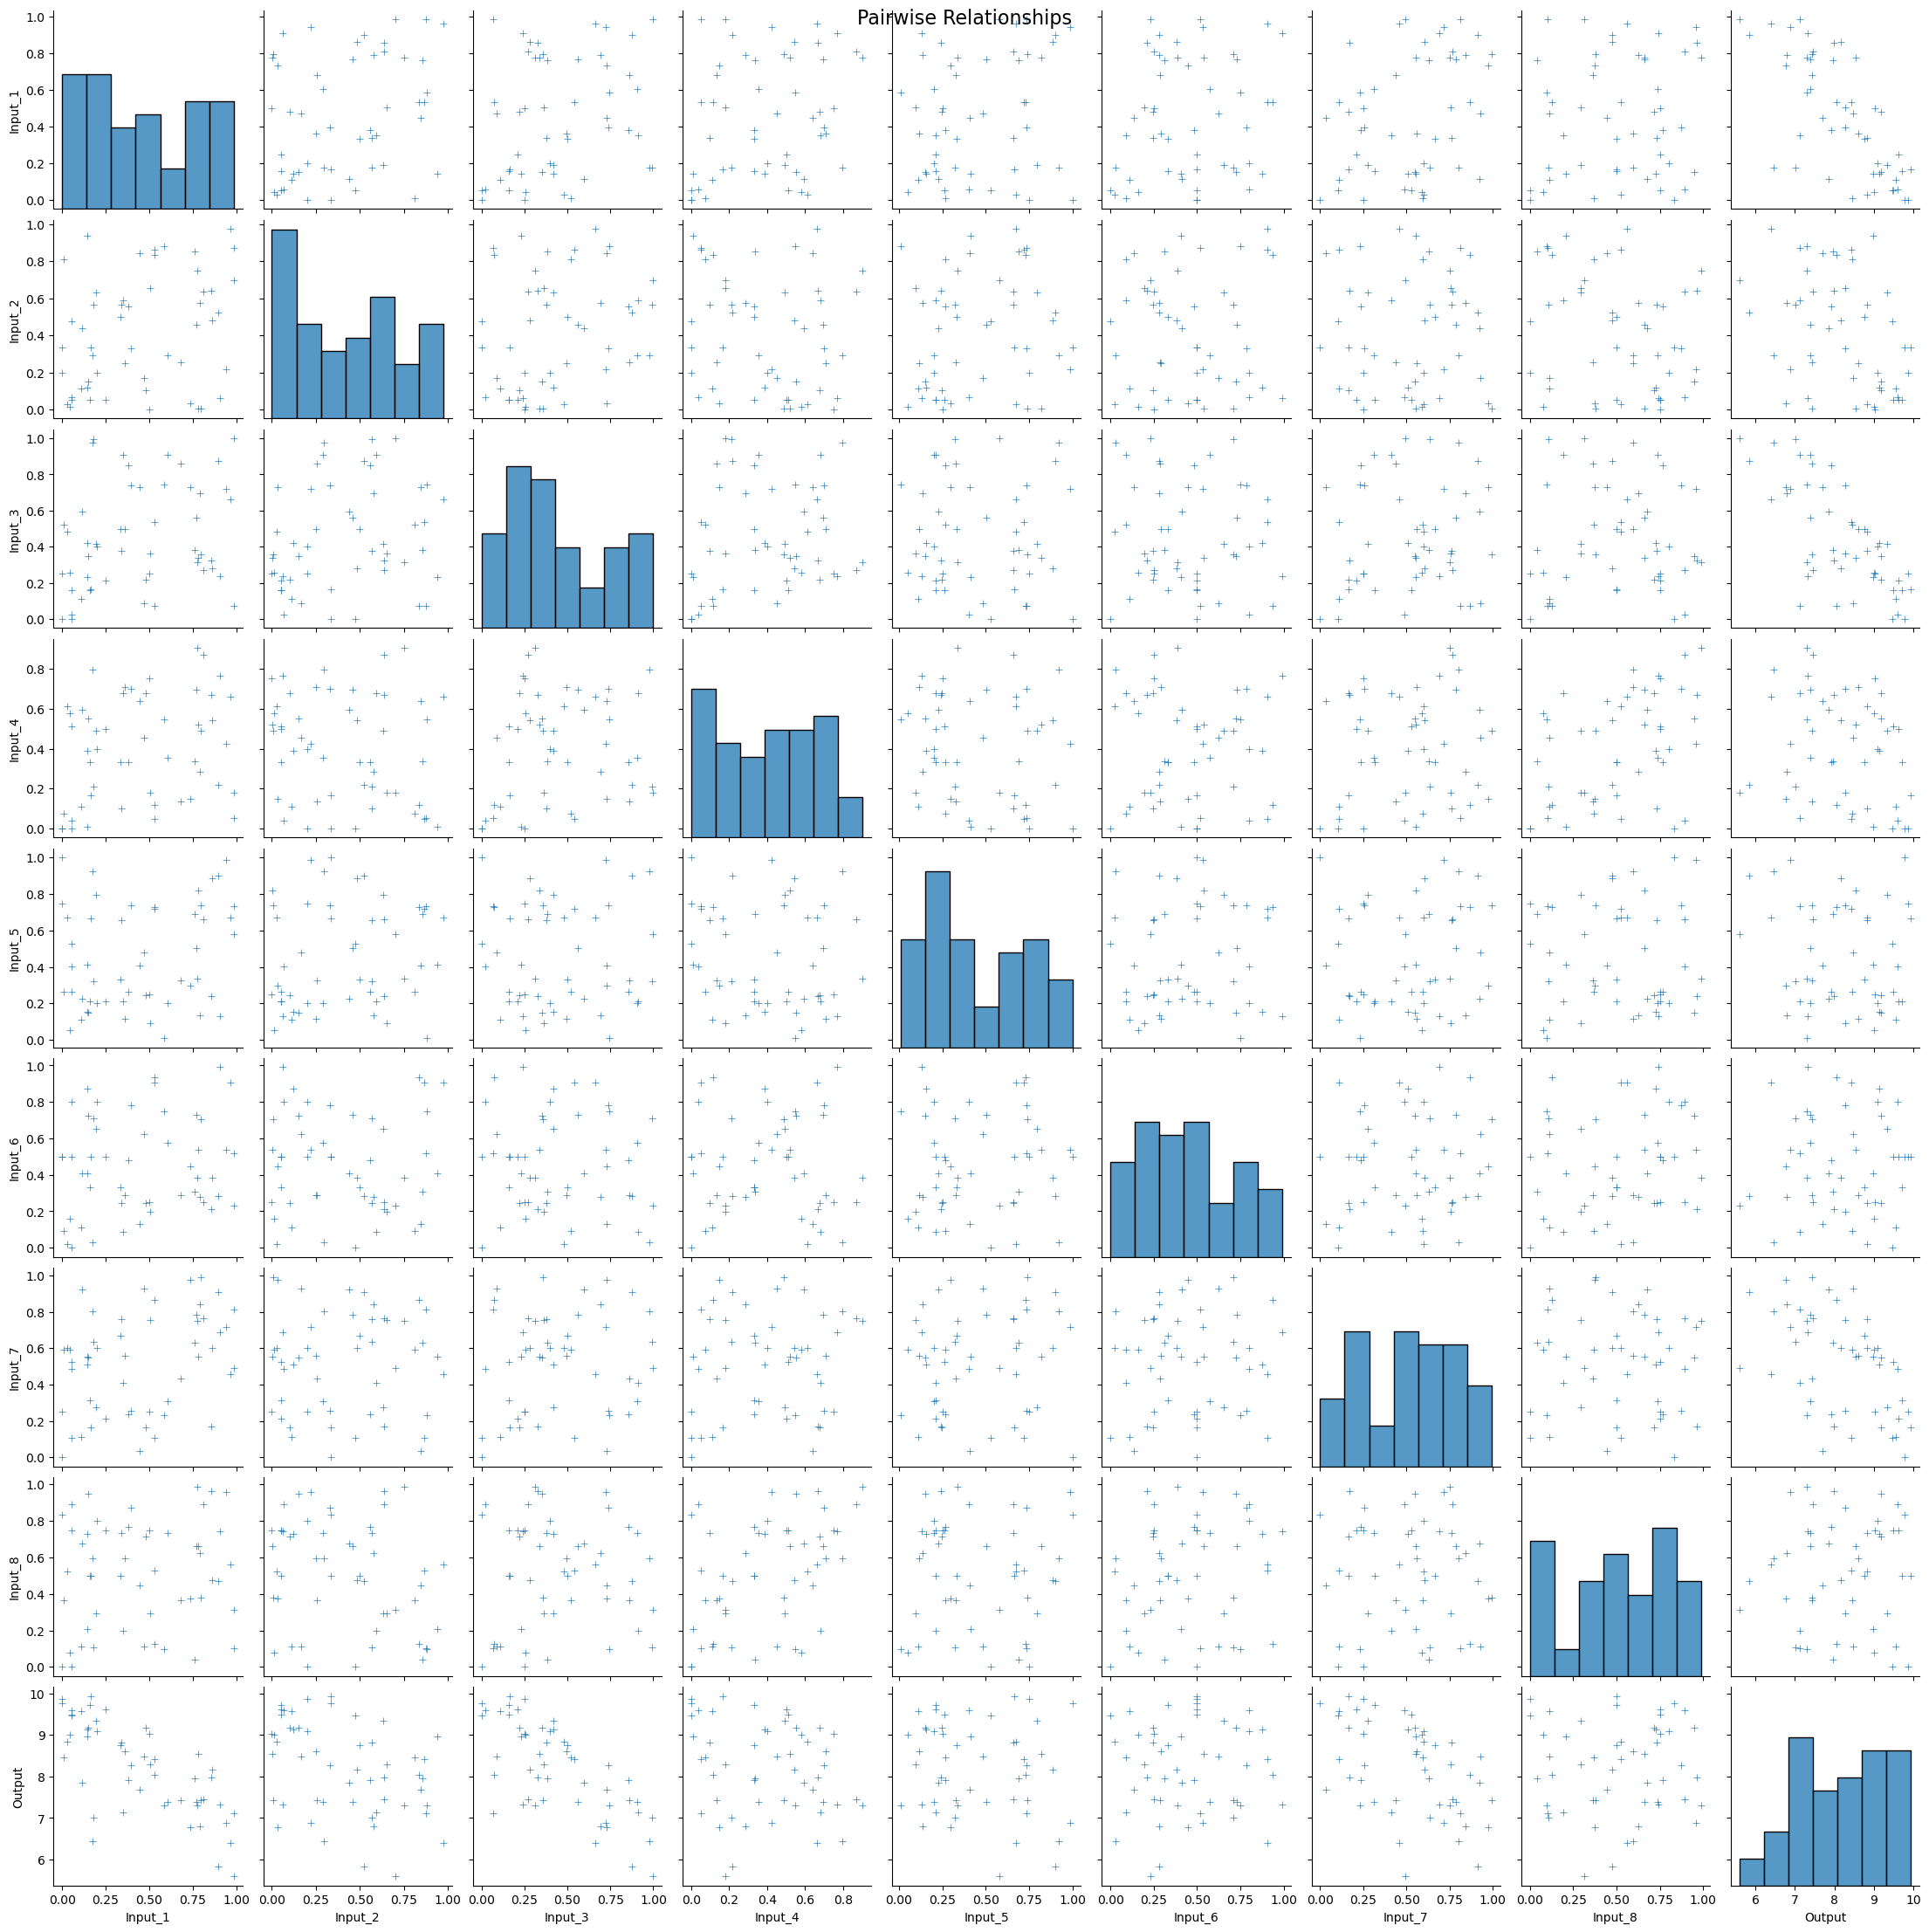

In [7]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## FOR THIS CASE ONLY


# 


## Definir las variables

In [14]:
X = df.drop(columns=['Output'])
y = df[['Output']] 

# O estandarizamos datos
#scaler = StandardScaler()
#y = torch.tensor(scaler.fit_transform(y)).float()

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it

START_TIME=time.time()

# Parameters of the model
#****************************************
noise_assumption = 1e-10 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = 1 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=0.1, nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=7    #Numero de datos para cada variable en el Grid. ALCANZA 7 en el grid -TOMA 5 MINUTOS APROX y OTROS 5 para el modelo  
dim=8    #Numero de Inputs
#******************************************************

x1 = np.linspace(0.000001, 0.999999, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables
# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid_df, return_std = True)

END_TIME=time.time()
ELAPSED_TIME=END_TIME-START_TIME
print("Time: ", ELAPSED_TIME)

Time:  109.28379011154175


In [16]:
#Acquisition function
#######################################################

beta = 1.96
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.000001-0.166667-0.166667-0.166667-0.999999-0.666666-0.333334-0.999999]


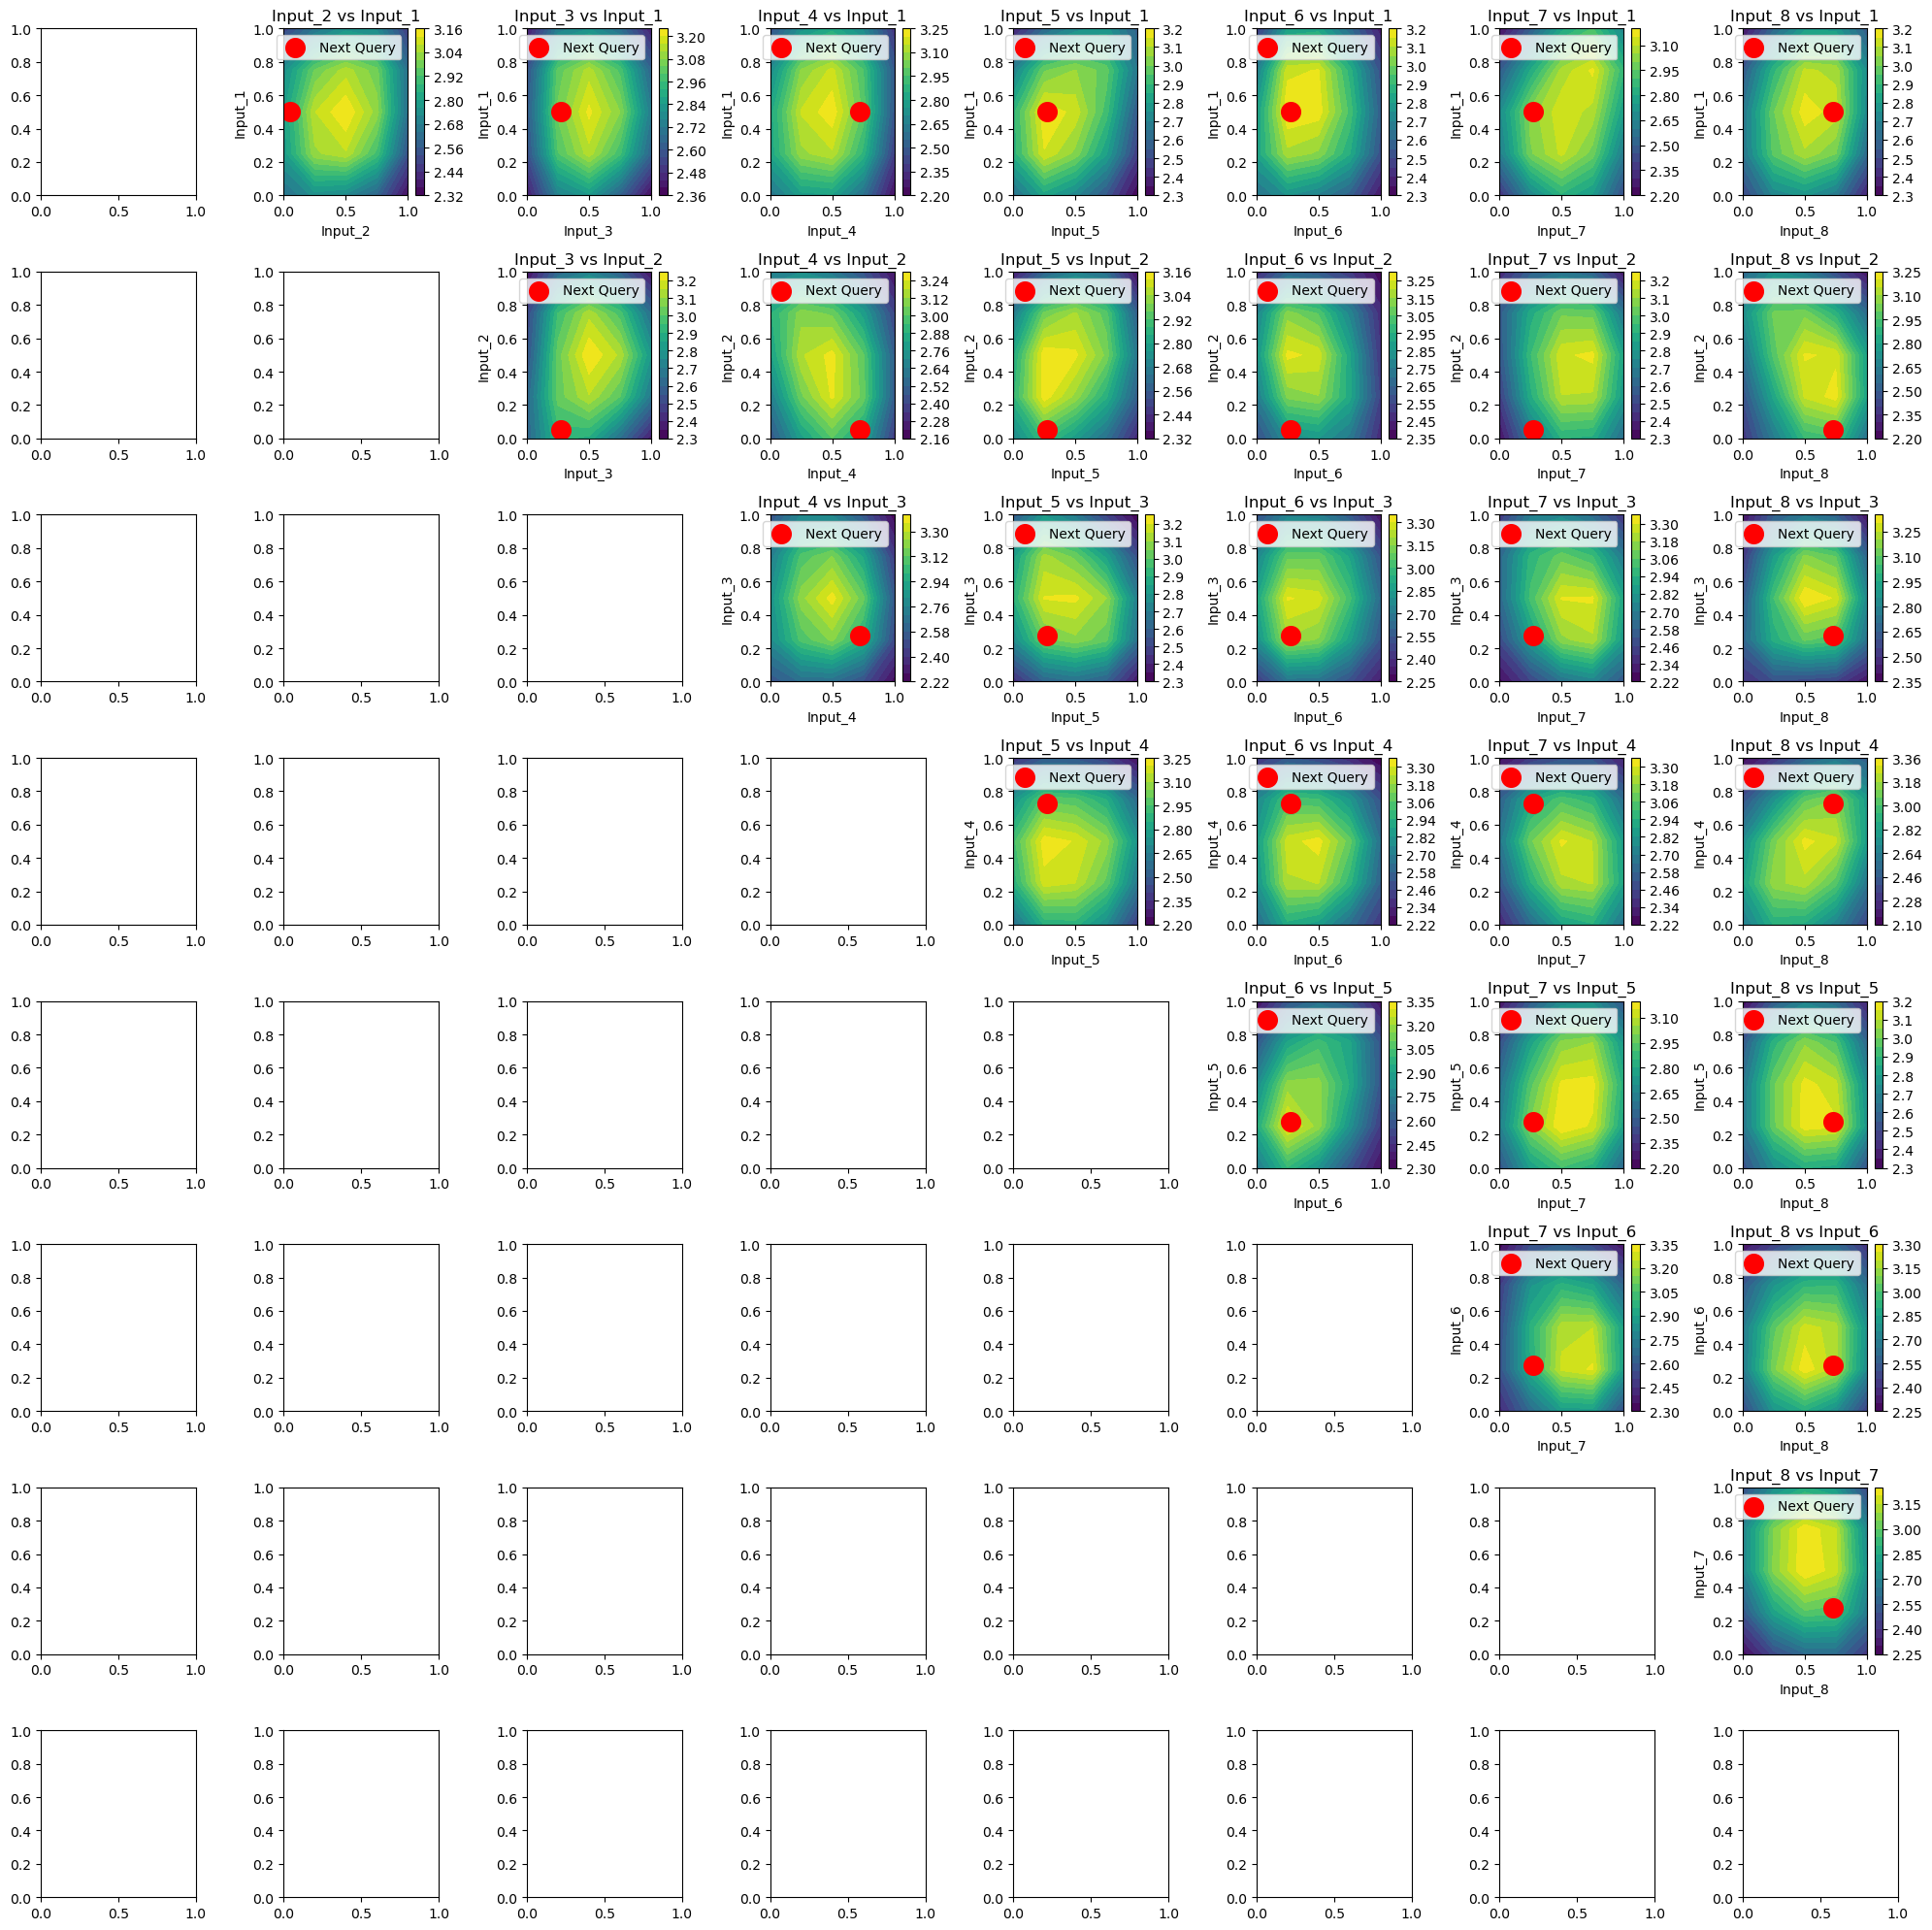

In [589]:
input_labels = X.columns.tolist()  # Correctly fetching input labels from DataFrame

# Create figure for plotting
fig, axes = plt.subplots(dim, dim, figsize=(20, 20))

for i, j in combinations(range(dim), 2):
    ax = axes[i, j] if dim > 1 else axes[max(i, j)]  # Correct indexing for subplot
    reshaped_acq_func = acquisition_function.reshape([GG]*dim)

    # Reduce all dimensions except for i and j
    axes_to_avg = tuple(k for k in range(dim) if k not in [i, j])
    reshaped_acq_func = np.mean(reshaped_acq_func, axis=axes_to_avg)
    
    # Create meshgrid for the contour plot
    x, y = np.meshgrid(np.linspace(0, 1, GG), np.linspace(0, 1, GG))
    cp = ax.contourf(x, y, reshaped_acq_func, cmap='viridis', levels=20)
    fig.colorbar(cp, ax=ax)
    
    # Plot the location of the next query: Ensure axis alignment is correct
    # Swap the indices for x and y based on their respective dimensions
    next_query_x = next_query[j]  # Using j for x-axis
    next_query_y = next_query[i]  # Using i for y-axis

    # Convert to plot scale
    next_query_x_idx = int(next_query_x * (GG - 1))
    next_query_y_idx = int(next_query_y * (GG - 1))

    # Plot the location of the next query
    ax.scatter(next_query_x, next_query_y, color='red', s=200, label='Next Query')
    ax.legend()

    ax.set_title(f'{input_labels[j]} vs {input_labels[i]}')  # Ensure correct title
    ax.set_xlabel(input_labels[j])  # x-axis should use j
    ax.set_ylabel(input_labels[i])  # y-axis should use i

plt.tight_layout()
plt.show()

In [17]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.000001-0.166667-0.166667-0.166667-0.999999-0.666666-0.333334-0.999999]
Beta CERO [0.000001-0.166667-0.166667-0.166667-0.833333-0.666666-0.333334-0.833333]
Beta 2.6 [0.000001-0.166667-0.166667-0.166667-0.999999-0.666666-0.333334-0.999999]
ONLY std [0.999999-0.000001-0.999999-0.999999-0.999999-0.999999-0.000001-0.000001]


# stud 544

### 28 Apr. Ask 1. [0.150000-0.150000-0.350000-0.550000-0.150000-0.725000-0.550000-0.950000]
Con todas las variables
[0.050000-0.050000-0.050000-0.050000-0.500000-0.725000-0.500000-0.950000]
Corriedo sin inputs 6 y 8, corri todo y le agregue los valores del modelo completo para esos dos inputs
[0.150000-0.150000-0.350000-0.550000-0.150000-0.725000-0.550000-0.950000]

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.500000-0.000001-0.250000-0.750000-0.250000-0.250000-0.250000-0.750000]
- [0.150000-0.150000-0.350000-0.550000-0.150000-0.725000-0.550000-0.950000]

#### 10 MAy
Voy a volver a hacer lo mismo jugando con distingos inputs eliminados
- Current max: 0.056	0.065	0.022	0.038	0.403	0.801	0.488	0.893	Out 9.598

- Length .3
- Beta 2.6 [0.333334-0.500000-0.500000-0.333334-0.333334-0.333334-0.666666-0.500000]
- Length .2
- Beta 2.6 [0.200001-0.200001-0.400000-0.400000-0.200001-0.799999-0.600000-0.799999]
- Sin 3 inputs (4,6,8) y lenscale .2
- Beta 2.6 [0.157895-0.052632-0.157895-0.333333-0.210527-0.333333-0.315790-0.500000]***

#### 14 may
Inputs 1 y 3 son muy importantes. Se refuerza que 4,6 y 8 no
- Length .3
- Beta 2.6 [0.250000-0.250000-0.500000-0.500000-0.250000-0.500000-0.500000-0.750000]
- Length .2
- Beta 2.6 [0.500000-0.000001-0.250000-0.750000-0.250000-0.250000-0.250000-0.750000]
- Sin 3 inputs (4,6,8) y lenscale .2. Se agregan los lenght 3 para los inputs malos.
- Beta 2.6 [0.315790-0.052632-0.210527-0.500000-0.210527-0.500000-0.210527-0.750000]

**** Voy por el ultimo tantito modif [0.250000-0.052632-0.210527-0.500000-0.210527-0.500000-0.210527-0.750000]

#### 17 may
- Beta 1.96 [0.250000-0.250000-0.500000-0.500000-0.250000-0.500000-0.500000-0.750000] len .3
- Beta 2.6 [0.250000-0.000001-0.250000-0.500000-0.250000-0.500000-0.250000-0.750000] len .2
- Beta 2.6 sin Variables [0.052632-0.052632-0.157895-xxxx-0.263158-xxxx-0.526316-xxxx] len .2
- **** Log Likelihood process******
- Beta 1.96 [0.000001-0.20000-0.250000-0.000001-0.750000-0.500000-0.250000-0.000001]**NEw max
- Beta CERO [0.250000-0.250000-0.250000-0.250000-0.500000-0.500000-0.250000-0.250000]
- Beta 2.6 [0.250000-0.250000-0.000001-0.000001-0.750000-0.750000-0.000001-0.000001]
- ********Vamos por
- [0.052632-0.052632-0.157895-0.511111-0.263158-0.499999-0.526316-0.749999]
- [0.000001-0.200000-0.250000-0.000001-0.750000-0.500000-0.250000-0.000001] **NEw max

#### 1 JUN
- Log likelihood, sin dropear datos. Normal
- Beta 1.96 [0.000001-0.250000-0.250000-0.000001-0.999999-0.750000-0.250000-0.750000]
- Beta 2.6 [0.000001-0.250000-0.250000-0.000001-0.999999-0.500000-0.000001-0.999999]
- Log likelihood, sin dropear datos. CON DATOS ESCALADOS
- Beta 1.96 [0.000001-0.250000-0.000001-0.000001-0.999999-0.500000-0.000001-0.999999]
- Beta 2.6 [0.000001-0.500000-0.000001-0.000001-0.999999-0.500000-0.000001-0.999999]
- LOG LIKE, DATOS ESCALADOS Y GRID MAS AMPLIO
- Beta 1.96 [0.000001-0.333334-0.000001-0.000001-0.999999-0.500000-0.000001-0.833333]+
- Beta 2.6 [0.000001-0.333334-0.000001-0.000001-0.999999-0.500000-0.000001-0.999999]

- ******* VAMOS POR [0.000001-0.333334-0.000001-0.000001-0.999999-0.500000-0.000001-0.833333]

#### 7 jun
- Log likelihood con datos escalados
- Beta 1.96 [0.333334-0.166667-0.000001-0.000001-0.999999-0.000001-0.000001-0.000001]
- Beta CERO [0.166667-0.333334-0.166667-0.166667-0.666666-0.500000-0.166667-0.500000]++ **new max**
- Beta 2.6 [0.333334-0.000001-0.000001-0.000001-0.999999-0.000001-0.000001-0.000001]
- query EI: [0.999999-0.999999-0.999999-0.333334-0.666666-0.333334-0.999999-0.500000]
- query PI: [0.000001-0.166667-0.999999-0.833333-0.833333-0.000001-0.833333-0.500000]

- Log likelihood con datos escalados droppeando features
- Beta 1.96 [0.052632-0.473684-0.000001-0.526316-0.105264]&&
- Beta CERO [0.105264-0.315790-0.052632-0.631579-0.210527]
- Beta 2.6 [0.000001-0.578947-0.000001-0.473684-0.000001]
- query EI: [0.999999-0.999999-0.999999-0.684210-0.999999]
- query PI: [0.105264-0.263158-0.999999-0.842105-0.842105]
-     &&Beta 1.96 [0.052632-0.473684-0.000001-0.000001-0.526316-0.000001-0.105264-0.000001]+

- ******* VAMOS POR [0.052632-0.473684-0.000001-0.000001-0.526316-0.000001-0.105264-0.000001]+
y [0.166667-0.333334-0.166667-0.166667-0.666666-0.500000-0.166667-0.500000]++

#### 13 jujn
- Log likelihood con datos escalados
- Beta 1.96 [0.000001-0.000001-0.333334-0.000001-0.999999-0.999999-0.000001-0.999999]
- Beta CERO [0.000001-0.166667-0.166667-0.166667-0.666666-0.666666-0.166667-0.833333]
- Beta 2.6 [0.000001-0.999999-0.000001-0.000001-0.000001-0.999999-0.000001-0.999999]
- ONLY std [0.999999-0.000001-0.999999-0.999999-0.999999-0.999999-0.000001-0.000001]
- query EI: [0.999999-0.999999-0.999999-0.333334-0.666666-0.333334-0.999999-0.500000]
- query PI: [0.000001-0.166667-0.999999-0.833333-0.833333-0.000001-0.833333-0.500000]

- Log likelihood con datos escalados droppeando features 6 y 8
- Beta 1.96 [0.000001-0.000001-0.000001-0.454546-0.999999-0.000001]
- Beta CERO [0.090910-0.090910-0.090910-0.181819-0.909090-0.181819] &&
- Beta 2.6 [0.000001-0.000001-0.000001-0.636363-0.999999-0.000001]
- ONLY std [0.000001-0.999999-0.000001-0.999999-0.000001-0.000001]

- **** Vamos por Beta Cero de total y de features parciales
- [0.000001-0.166667-0.166667-0.166667-0.666666-0.666666-0.166667-0.833333]
- [0.090910-0.090910-0.090910-0.181819-0.909090-0.999999-0.181819-0.900000]

In [613]:
#************************************************************************************+
#************************************************************************************+
#************************************************************************************+
#************************************************************************************+


In [98]:
X = df.drop(columns=['Input_4','Input_6','Input_8','Output'])
y = df[['Output']] 

In [99]:
# Parameters of the model
#****************************************
noise_assumption = 1e-6 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = .2 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=0.1, nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=20    #Numero de datos para cada variable en el Grid.  
dim=5    #Numero de Inputs
#******************************************************

x1 = np.linspace(0.000001, .999999, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid, return_std = True)

/Users/macponcho/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [47]:
#Acquisition function
#######################################################

beta = 1.96
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.052632-0.052632-0.105264-0.315790-0.473684]


In [48]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.052632-0.052632-0.105264-0.315790-0.473684]
Beta CERO [0.157895-0.105264-0.157895-0.157895-0.210527]
Beta 2.6 [0.052632-0.052632-0.157895-0.263158-0.526316]
ONLY std [0.999999-0.000001-0.999999-0.999999-0.000001]


## Probando optimizacion de parametros LOG LIKELIHOOD
:
### OJO reiniciar X & y desde el principio

In [32]:
#X = df.drop(columns=['Output'])
X = df.drop(columns=['Input_6','Input_8','Output'])
y = df[['Output']] 

#********************
#Grid:
GG=12    #Numero de datos para cada variable en el Grid. ALCANZA 7 en el grid -TOMA 5 MINUTOS APROX y OTROS 5 para el modelo  
dim=6   #5  #Numero de Inputs
#******************************************************

x1 = np.linspace(0.000001, 0.999999, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables

# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
#********************


In [33]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
import itertools as it
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# O estandarizamos datos
scaler = StandardScaler()
y = torch.tensor(scaler.fit_transform(y)).float()

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-10, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    # Define kernel with given length scale
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X, y)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=33)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")


/Users/macponcho/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1e-10] before, using random point [0.12024920673134472, 0.06342833756381068]
  warnings.warn(
/Users/macponcho/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1e-10] before, using random point [0.7729916949310262, 0.013168687401805865]
  warnings.warn(
/Users/macponcho/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1e-10] before, using random point [0.32950642494258336, 0.0727666104656374]
  warnings.warn(
/Users/macponcho/anaconda3/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 1e-10] before, using random point [0.7609446512368291, 0.05126650508631406]
  warnings.warn(
/Users/macponcho/anaco

Best length scale: 1.0
Best noise level: 1e-10


In [34]:
# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X, y)

# Predictions using the surrogate model
mean, std = GPR_model_best.predict(X_grid_df, return_std=True)

# Acquisition function
beta = 1.96
acquisition_function = mean + beta * std

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"Next query point with Beta 1.96: [{formatted_row}]")
print("     ")


Next query point with Beta 1.96: [0.000001-0.000001-0.000001-0.454546-0.999999-0.000001]
     


In [35]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.000001-0.000001-0.000001-0.454546-0.999999-0.000001]
Beta CERO [0.090910-0.090910-0.090910-0.181819-0.909090-0.181819]
Beta 2.6 [0.000001-0.000001-0.000001-0.636363-0.999999-0.000001]
ONLY std [0.000001-0.999999-0.000001-0.999999-0.000001-0.000001]


In [36]:
# Acquisition function choices

acquisition_function = gaussian_ei(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query EI: [{formatted_row}]")

# */*******************************************************************************

acquisition_function = gaussian_pi(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query PI: [{formatted_row}]")

query EI: [0.999999-0.999999-0.999999-0.909090-0.636363-0.909090]
query PI: [0.000001-0.090910-0.818181-0.727272-0.818181-0.727272]
